In [1]:
import numpy as nn
import matplotlib.pyplot as pp
from scipy import interpolate, integrate, optimize

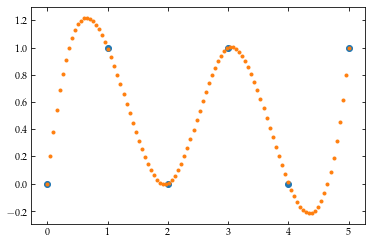

In [2]:
# interpolate
x = nn.array([0,1,2,3,4,5])
y = nn.array([0,1,0,1,0,1])
inter = interpolate.interp1d(x,y,kind="cubic")
xx = nn.linspace(min(x), max(x), 100)
yy = inter(xx)

pp.scatter(x,y)
pp.scatter(xx,yy,marker=".")
pp.show()

In [3]:
# integrate
print(integrate.quadrature(nn.sin,0,41*nn.pi))
print(integrate.quadrature(inter,0,5))

(2.000000002128429, 1.7246018835237464e-08)
(2.4999999999999996, 0.0)


True
[0.99295246 1.89724983]
[0.05740646 0.22220219]


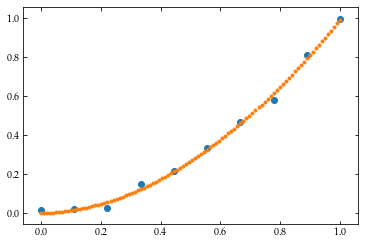

In [4]:
# leastsq
x = nn.linspace(0, 1, 10)
y = x**2 + nn.random.random(len(x))*0.1-0.05
sigma = 0.1 * nn.ones(len(x))
def func(x, params):
    A,p=params
    return A * x**p
def residuals(params,*args):
    x,y,sigma=args
    return (func(x,params)-y)/sigma
out = optimize.least_squares(residuals,[1,1],args=[x,y,sigma],method="lm")
print(out.success)
print(out.x)
hessian = out.jac.transpose().dot(out.jac)
alpha = 2*hessian
C = nn.linalg.inv(alpha)
unc=nn.sqrt(nn.diagonal(C))
print(unc)
xx = nn.linspace(0,1,100)
yy = func(xx, out.x)
pp.scatter(x,y)
pp.scatter(xx,yy,marker=".")
pp.show()

In [5]:
# minimize
x = nn.linspace(0, 1, 10)
y = x**2 + nn.random.random(len(x))*0.1-0.05
sigma = 0.1 * nn.ones(len(x))
def func(x, params):
    A,p=params
    return A * x**p
def chisq(params):
    return nn.sum(((func(x,params)-y)/sigma)**2)
out = optimize.minimize(chisq,[1,1],method="Nelder-Mead")
print(out.success)
print(out.x)

True
[0.99882336 1.95800687]


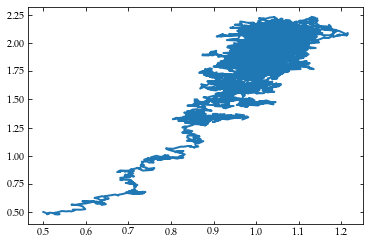

[1.01456348 1.90148801]
[0.05571666 0.18165264]


In [6]:
# mcmc
x = nn.linspace(0, 1, 10)
y = x**2 + nn.random.random(len(x))*0.1-0.05
sigma = 0.1 * nn.ones(len(x))

var0 = nn.array([.5,.5])
var0_sigma = nn.array([.1, .1])/10
def func(x, params):
    A,p=params
    return A * x**p
def chisq(params):
    return nn.sum(((func(x,params)-y)/sigma)**2)

params = var0
steps = nn.zeros((10000, len(params)))
for i in range(len(steps)):
    steps[i,:] = params
    while True:
        params2 = nn.random.normal(size=len(var0)) * var0_sigma + params
        if nn.exp(chisq(params)-chisq(params2)) > nn.random.rand():
            params = params2
            break
pp.plot(steps[:,0], steps[:,1])
pp.show()
print(nn.average(steps[500:], axis=0))
print(nn.std(steps[500:], axis=0))

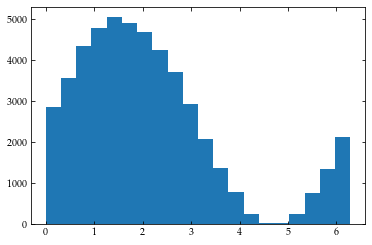

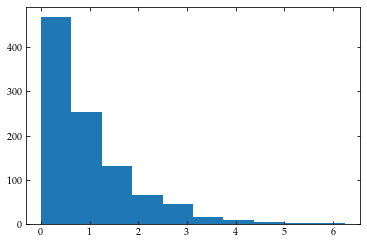

In [7]:
# random
a = nn.random.random(100000) * 2*nn.pi
b = nn.random.random(len(a))*2-1
c = a[nn.sin(a) > b]
pp.hist(c, bins=20)
pp.show()
pp.hist(nn.random.exponential(scale=1,size=1000))
pp.show()

[ 9.44002432e-01  2.40192481e-17 -4.99403258e-01  1.16893674e-16
  2.79920796e-02 -2.05498012e-17 -5.96695197e-04  2.26448134e-16
  6.70439487e-06 -2.01895125e-16 -4.65322974e-08 -3.53283108e-16
  2.20093988e-10]


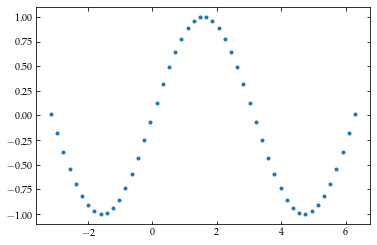

In [8]:
# chebyshev
def ChebyshevCoefficients(func,a,b,n):
    '''Evaluate n chebyshev coefficients for func evaluated between a and b;  based on NR 5.8.7'''
    rnge=0.5*(b-a)  
    average=0.5*(b+a)
    x=rnge*nn.cos((nn.arange(0,n)+0.5)*nn.pi/n)+average  #maps from -1 to 1 onto a-b
    v=func(x).reshape(1,n)  #row array of function values
    A=nn.cos(nn.pi/n*nn.arange(0,n)*((nn.arange(0,n)+0.5)).reshape(n,1))
    C=nn.dot(v,A)*2/n 
    return C.reshape(-1)
    
def ChebEval(x,c,a,b):
    '''Evaluate a chebyshev series c(x), for the rnge a-b'''
    rnge=0.5*(b-a)
    average=0.5*(a+b)
    mapped=(x-average)/rnge
    return nn.polynomial.chebyshev.chebval(mapped,c)-c[0]/2
    
ch = ChebyshevCoefficients(nn.sin,0,nn.pi,13)
print(ch)
x = nn.linspace(-nn.pi, 2*nn.pi)
y = ChebEval(x, ch, 0,nn.pi)
pp.scatter(x,y,marker=".")
pp.show()

In [9]:
# inheritance
class parent:
    def __init__(self):
        self.x = 11
class child(parent):
    pass
c = child()
c.x

11

In [10]:
# odeint
R1 = 1e5  # Ohm
R2 = 1e5  # Ohm
C = 25e-9 # F
def diff_eq(params, t):
    q1,q2,q3 = params
    i1 = Vi(t)/R1 - q1/C/R1
    i2 = q3/C/R2
    i3 = i1 - i2
    return nn.array([i1,i2,i3])
start_vector = nn.array([0,0,0])
def Vi(t):
    return 5*nn.sin(2*nn.pi*freq*t)
freq = 10
t = nn.linspace(0, 20./freq, 1000)
sol = integrate.odeint(diff_eq, start_vector, t, rtol=1e-10, atol=1e-10)